In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dongsi.csv to Dongsi.csv


In [ ]:
data=read_csv("Dongsi.csv")
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2


In [ ]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Dongsi.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [ ]:
dataset

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,,,,,
2013-03-01 00:00:00,1,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
2013-03-01 01:00:00,2,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2013-03-01 02:00:00,3,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
2013-03-01 03:00:00,4,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9
2013-03-01 04:00:00,5,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,35061,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,35062,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1


In [ ]:
dataset.drop("No", axis=1, inplace=True)

In [ ]:
dataset

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,,,,
2013-03-01 00:00:00,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
2013-03-01 01:00:00,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2013-03-01 02:00:00,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
2013-03-01 03:00:00,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9
2013-03-01 04:00:00,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1


In [ ]:
dataset.isnull().sum()

PM2.5     750
PM10      553
SO2       663
NO2      1601
CO       3197
O3        664
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         78
WSPM       14
dtype: int64

In [ ]:
dataset=dataset.fillna(method="pad")

In [ ]:
dataset.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
dataset.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,86.310293,110.584283,18.527338,52.194294,1363.244439,57.525669,13.668746,1012.551858,2.445117,0.063983,1.860712
std,86.337389,98.181732,22.974084,34.475533,1201.231679,58.674161,11.460066,10.266719,13.812242,0.786059,1.280429
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,23.000000,38.000000,3.427200,26.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,61.000000,87.000000,10.000000,46.000000,1000.000000,44.553600,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,120.000000,151.000000,24.000000,72.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [ ]:
dataset_columns = dataset.columns.tolist()
dataset_columns

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM']

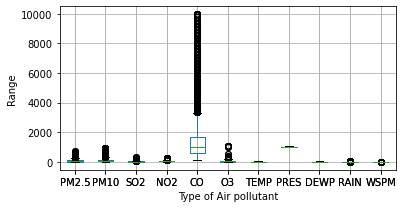

In [ ]:
#Box plot
plt.rcParams["figure.figsize"] = [5.7, 3]
plt.rcParams["figure.autolayout"] = True
dataset.boxplot()
p = dataset.boxplot(grid=True)
p.set_xlabel('Type of Air pollutant')
p.set_ylabel('Range')

plt.savefig(r'./Dongsisobaric.jpg', dpi=400)
plt.show()

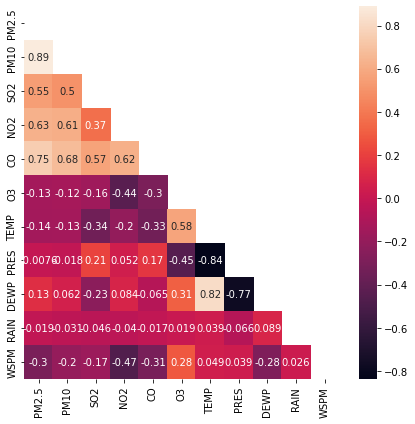

In [ ]:
# applying mask
mask = np.triu(np.ones_like(dataset.corr()))
f, ax = plt.subplots(figsize=(6, 6))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)
plt.savefig(r'./Dongsiheat.jpg', dpi=400) 
# displaying heatmap
plt.show()

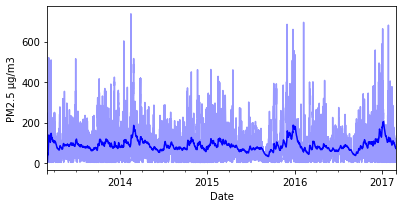

In [ ]:
dataset['PM2.5'].to_frame()
f.set_figwidth(5)
f.set_figheight(3)
p=dataset["PM2.5"].plot(color= "blue", alpha=0.4)
#p=dataset['PM2.5'].rolling(168).mean().plot(color= "green")
p=dataset['PM2.5'].ewm(span=720).mean().plot(color= "blue")
p.set_xlabel('Date')
p.set_ylabel('PM2.5 µg/m3')
plt.savefig(r'./dongsi.jpg', dpi=400)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = dataset.values
encoder = LabelEncoder()
values[:,10] = encoder.fit_transform(values[:,10])
values = values.astype('float32')
values[:,10]

array([6., 7., 6., ..., 7., 6., 5.], dtype=float32)

In [ ]:
values

array([[ 9. ,  9. ,  3. , ...,  0. ,  6. ,  5.7],
       [ 4. ,  4. ,  3. , ...,  0. ,  7. ,  3.9],
       [ 7. ,  7. ,  3. , ...,  0. ,  6. ,  5.3],
       ...,
       [23. , 58. ,  5. , ...,  0. ,  7. ,  1.1],
       [23. , 53. ,  9. , ...,  0. ,  6. ,  1.2],
       [30. , 71. , 11. , ...,  0. ,  5. ,  1.3]], dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35060, 1)
X (35060, 4, 12)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26300, 4, 12)
X_test (8760, 4, 12)
Y_train (26300, 1)
Y_test (8760, 1)


In [ ]:
#Lstm model build
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 50))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

In [ ]:
#Train the model
lstm_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size = 64, verbose=2)

Epoch 1/100
411/411 - 12s - loss: 0.0036 - val_loss: 0.0024 - 12s/epoch - 29ms/step
Epoch 2/100
411/411 - 5s - loss: 0.0017 - val_loss: 0.0014 - 5s/epoch - 12ms/step
Epoch 3/100
411/411 - 5s - loss: 0.0013 - val_loss: 9.8049e-04 - 5s/epoch - 12ms/step
Epoch 4/100
411/411 - 5s - loss: 0.0011 - val_loss: 0.0012 - 5s/epoch - 12ms/step
Epoch 5/100
411/411 - 5s - loss: 9.9837e-04 - val_loss: 8.6788e-04 - 5s/epoch - 12ms/step
Epoch 6/100
411/411 - 5s - loss: 9.6366e-04 - val_loss: 9.6152e-04 - 5s/epoch - 12ms/step
Epoch 7/100
411/411 - 5s - loss: 9.4531e-04 - val_loss: 8.2502e-04 - 5s/epoch - 12ms/step
Epoch 8/100
411/411 - 6s - loss: 9.3403e-04 - val_loss: 9.4279e-04 - 6s/epoch - 15ms/step
Epoch 9/100
411/411 - 5s - loss: 9.1446e-04 - val_loss: 8.2300e-04 - 5s/epoch - 13ms/step
Epoch 10/100
411/411 - 5s - loss: 9.0113e-04 - val_loss: 8.6036e-04 - 5s/epoch - 12ms/step
Epoch 11/100
411/411 - 5s - loss: 8.7247e-04 - val_loss: 8.0500e-04 - 5s/epoch - 12ms/step
Epoch 12/100
411/411 - 5s - loss: 

In [ ]:
from keras.models import load_model
model.save('AirPollutionLSTM.h5')

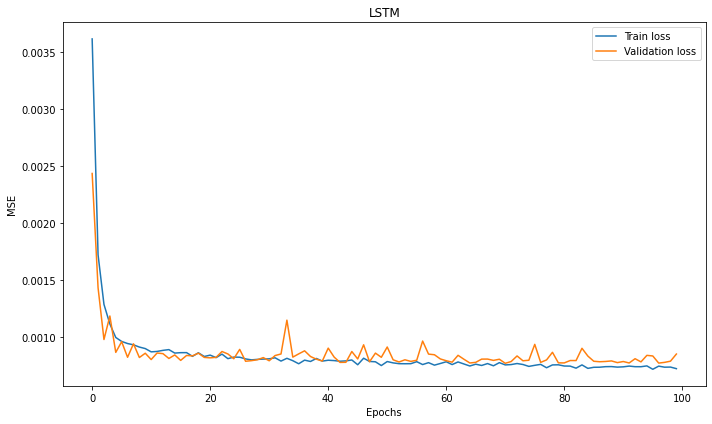

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(lstm_history.history['loss'], label='Train loss')
plt.plot(lstm_history.history['val_loss'], label='Validation loss')
plt.title("LSTM")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [ ]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 0s 11ms/step
RMSE at 40 = 7.6727505
RMAE at 40 = 2.568144
MAPE at 40 = 1.048337
R2 at 40 = 0.7614984172528346
2/2 [==============================] - 0s 10ms/step
RMSE at 45 = 8.608053
RMAE at 45 = 2.71627
MAPE at 45 = 0.94804466
R2 at 45 = 0.9050625840732838
2/2 [==============================] - 0s 7ms/step
RMSE at 50 = 9.041948
RMAE at 50 = 2.7722054
MAPE at 50 = 0.86185265
R2 at 50 = 0.9494728519043392
2/2 [==============================] - 0s 9ms/step
RMSE at 55 = 9.362219
RMAE at 55 = 2.7921853
MAPE at 55 = 0.7919231
R2 at 55 = 0.9505115472032144
2/2 [==============================] - 0s 8ms/step
RMSE at 60 = 9.44344
RMAE at 60 = 2.814877
MAPE at 60 = 0.7338754
R2 at 60 = 0.9523981469819051
3/3 [==============================] - 0s 5ms/step
RMSE at 65 = 10.131032
RMAE at 65 = 2.9099984
MAPE at 65 = 0.6956462
R2 at 65 = 0.9445785930630869
3/3 [==============================] - 0s 5ms/step
RMSE at 70 = 10.937507
RMAE at 70 = 2.982409
MAPE at 70

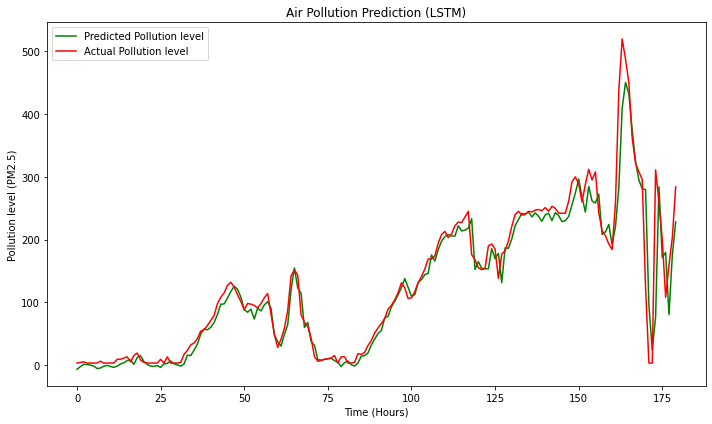

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (LSTM)")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graph_LSTM.png')

In [ ]:
savetxt('Predict_LSTM.csv', Y_predicted, delimiter=',')

In [ ]:
savetxt('Test_LSTM.csv', Y_test, delimiter=',')